<a href="https://colab.research.google.com/github/halimcan/Home-Credit-Default-Project/blob/master/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installments of required tables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#  BigQuery API activation
from google.colab import auth
auth.authenticate_user()


In [3]:
# big query add-on installation

!pip install --quiet google-cloud-bigquery
from google.cloud import bigquery


# Data Table Import from BigQuery

Application Training Import

In [4]:
# BigQuery client oluştur
client = bigquery.Client(project="homecredit-478707")

# Tabloyu BigQuery'den çek
query = """
SELECT *
FROM `homecredit-478707.Homecredit_Tables.application_training`
"""
app_train = client.query(query).to_dataframe()

In [5]:
app_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,False,False,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100122,0,Cash loans,F,False,False,1,76500.0,808650.0,26217.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100179,0,Cash loans,F,True,False,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0


In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: Int64(41), boolean(3), float64(65), object(13)
memory usage: 293.0+ MB


In [7]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307511.0,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.0,307511.0,...,307511.0,307511.0,307511.0,307511.0,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.00813,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.0,0.0,0.0,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.0,-17912.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.5,0.0,0.0,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.0,-2760.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.0,0.0,0.0,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.0,-1213.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.5,0.0,1.0,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.0,-289.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.0,1.0,19.0,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.0,365243.0,...,1.0,1.0,1.0,1.0,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Primary key check

print("Primary key unique?", app_train['SK_ID_CURR'].is_unique)

Primary key unique? True


In [9]:
app_train["SK_ID_CURR"].isna().sum() #

np.int64(0)

In [10]:
import pandas as pd

# 4) Null oranları
null_ratio = app_train.isnull().sum() / len(app_train)
null_ratio = null_ratio.sort_values(ascending=False)
print(null_ratio.head(20))  # en çok null olan 20 kolon

# There are lots of variables with too many missing values. As I will use LightGBM, I am going to left it as it is.

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
dtype: float64


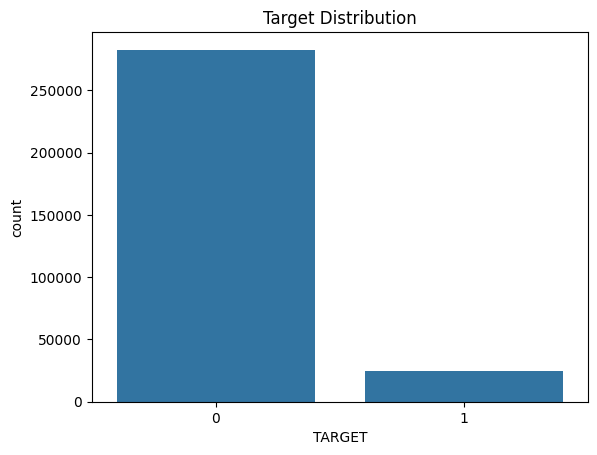

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: Float64


<Figure size 640x480 with 0 Axes>

In [11]:
# 5) Target distribution


sns.countplot(x='TARGET', data=app_train)
plt.title("Target Distribution")
plt.show()
print(app_train['TARGET'].value_counts(normalize=True))

plt.savefig("target_dist.png")

Target variable is dominated by less risky applicants(%91)

In [12]:
# 6) Numerical variables summary
numeric_cols = app_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(app_train[numeric_cols].describe())

# 106 numerical variables.

          SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count       307511.0  307511.0      307511.0      3.075110e+05  3.075110e+05   
mean   278180.518577  0.080729      0.417052      1.687979e+05  5.990260e+05   
std    102790.175348  0.272419      0.722121      2.371231e+05  4.024908e+05   
min         100002.0       0.0           0.0      2.565000e+04  4.500000e+04   
25%         189145.5       0.0           0.0      1.125000e+05  2.700000e+05   
50%         278202.0       0.0           0.0      1.471500e+05  5.135310e+05   
75%         367142.5       0.0           1.0      2.025000e+05  8.086500e+05   
max         456255.0       1.0          19.0      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min

In [13]:
# 7) Categorical variable summary(only 10)
categorical_cols = app_train.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"{col} value counts:")
    print(app_train[col].value_counts().head(10))


NAME_CONTRACT_TYPE value counts:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
CODE_GENDER value counts:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
NAME_TYPE_SUITE value counts:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
NAME_INCOME_TYPE value counts:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
NAME_EDUCATION_TYPE value counts:
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondar

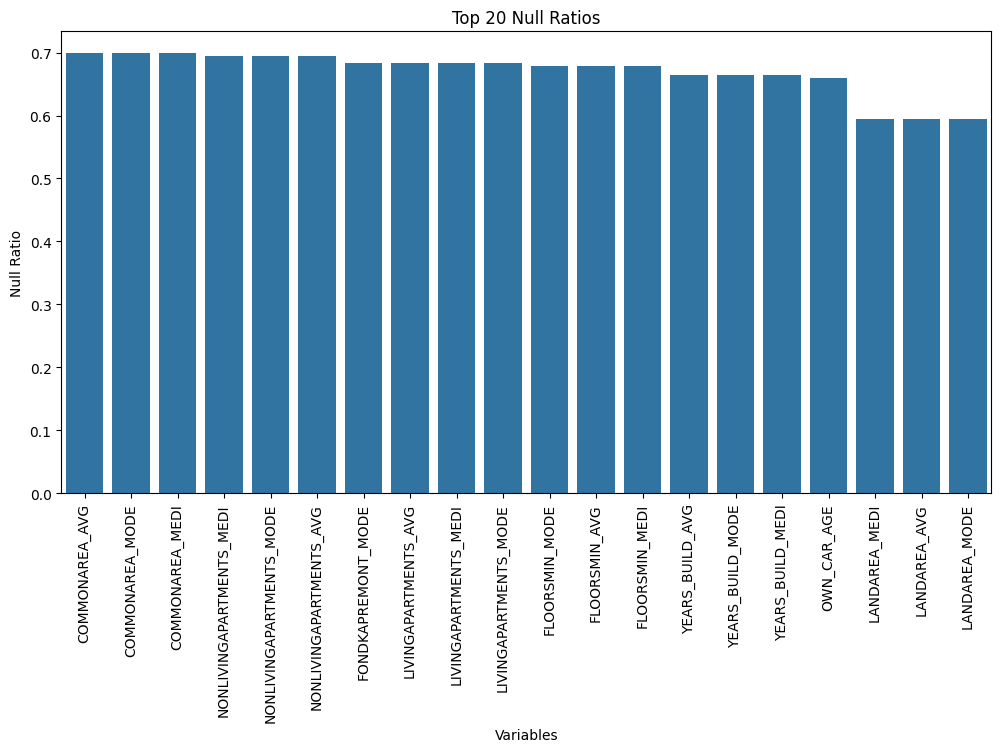

<Figure size 640x480 with 0 Axes>

In [14]:
# 8) Null ratio vis
plt.figure(figsize=(12,6))
sns.barplot(x=null_ratio.head(20).index, y=null_ratio.head(20).values)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Null Ratio")
plt.title("Top 20 Null Ratios")
plt.show()

plt.savefig("null_ratio.png")

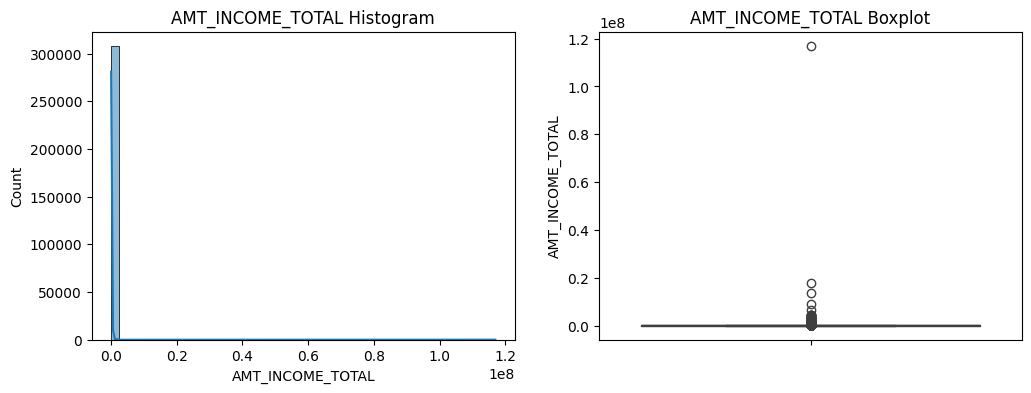

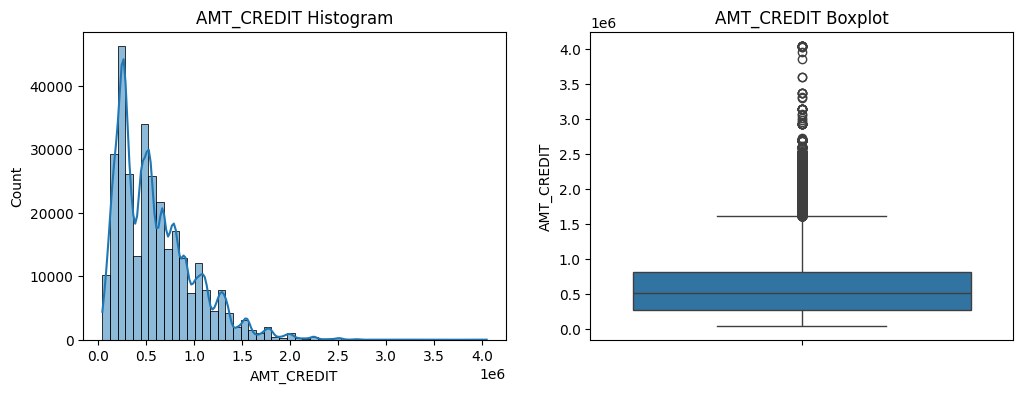

<Figure size 640x480 with 0 Axes>

In [15]:
from numpy import append
important_numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT']

for col in important_numeric_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(app_train[col], kde=True, bins=50)
    plt.title(f"{col} Histogram")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(app_train[col])
    plt.title(f"{col} Boxplot")

    plt.show()
plt.savefig("important_numeric_cols.png")


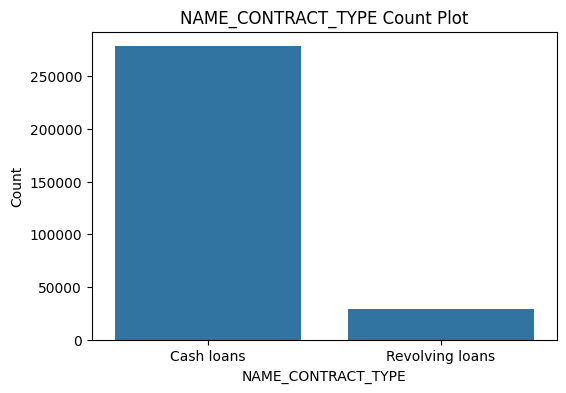

NAME_CONTRACT_TYPE value counts:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


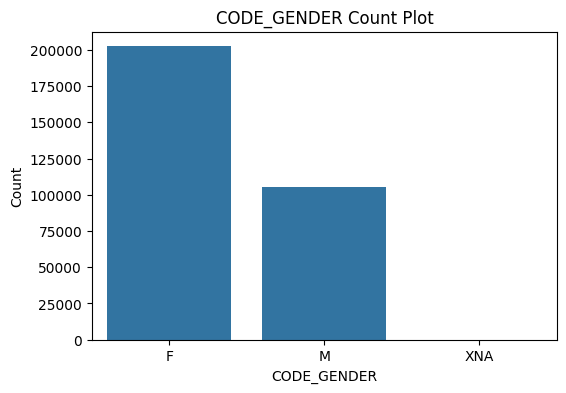

CODE_GENDER value counts:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [16]:
important_categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER']

for col in important_categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=app_train)
    plt.title(f"{col} Count Plot")
    plt.ylabel("Count")
    plt.show()

    # Detailed explanation
    print(f"{col} value counts:")
    print(app_train[col].value_counts())

plt.savefig("important_categorical_cols.png")

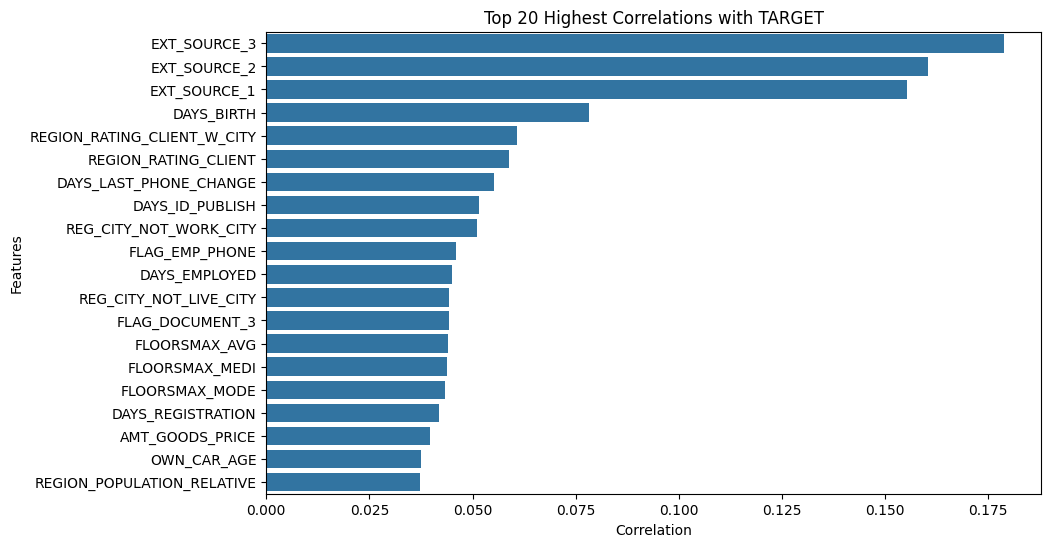

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE',
       'REGION_POPULATION_RELATIVE'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

In [18]:
# Correlation Heatmap

# Correlation matrix
numeric_cols = app_train.select_dtypes(include=['float64', 'int64']).columns
corr = app_train[numeric_cols].corr()

# Corr only with target
target_corr = corr['TARGET'].abs().sort_values(ascending=False)

# Except Target variable highest 20
top_features = target_corr.iloc[1:21].index

plt.figure(figsize=(10,6))
sns.barplot(x=target_corr[top_features], y=top_features)
plt.title("Top 20 Highest Correlations with TARGET")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

plt.savefig("highest_corr_with_target.png")

print(top_features)

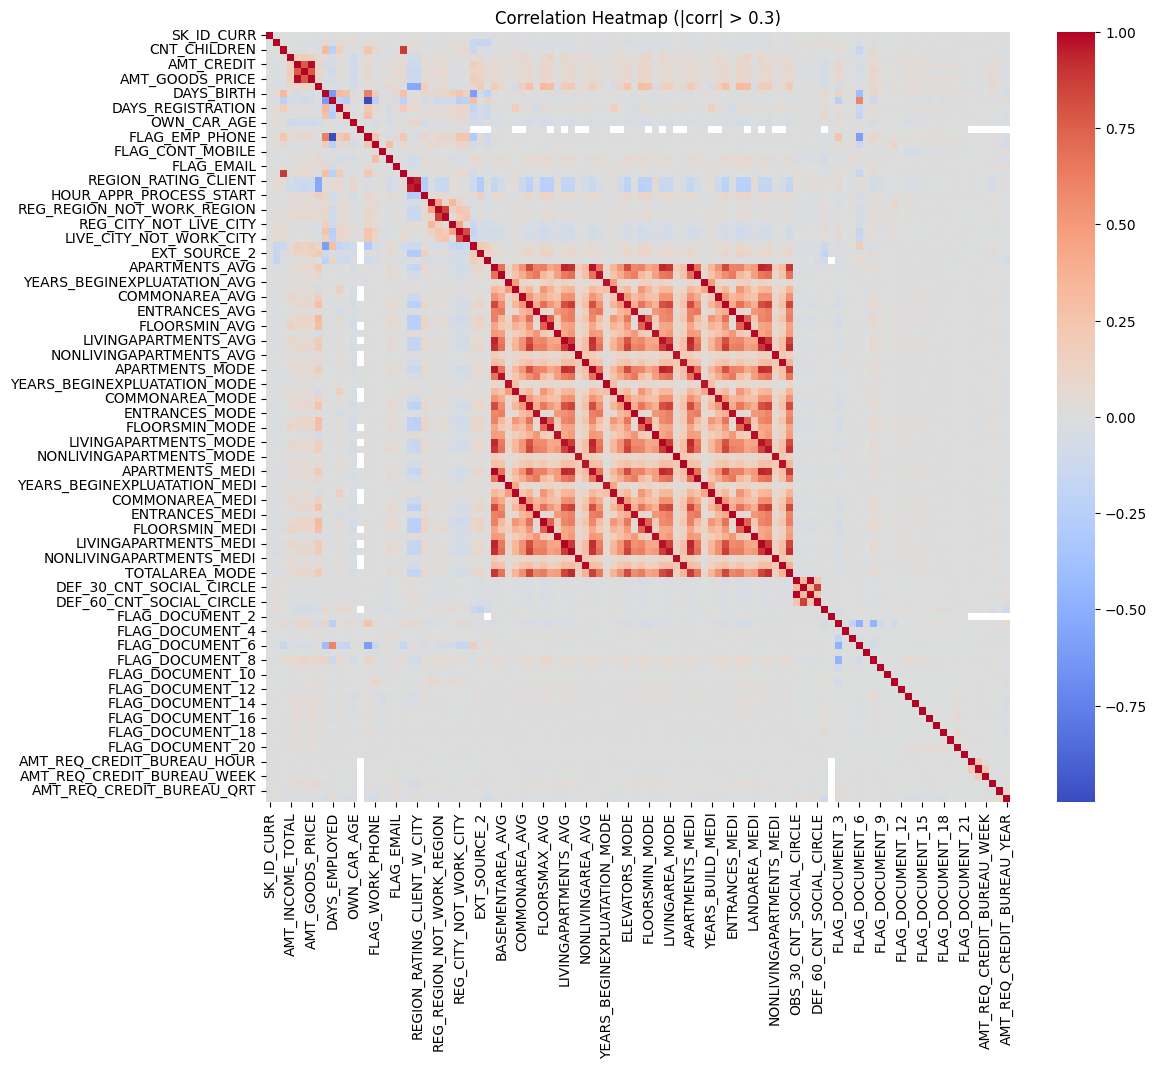

In [19]:
#  |corr| > 0.3 Variables Heatmap

# Correlation matrix
numeric_cols = app_train.select_dtypes(include=['float64', 'int64']).columns
corr = app_train[numeric_cols].corr()

# Threshold
threshold = 0.3

# Variables over threshold
filtered_cols = corr.columns[(corr.abs() > threshold).any()]

plt.figure(figsize=(12,10))
sns.heatmap(corr.loc[filtered_cols, filtered_cols], cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (|corr| > 0.3)")
plt.show()


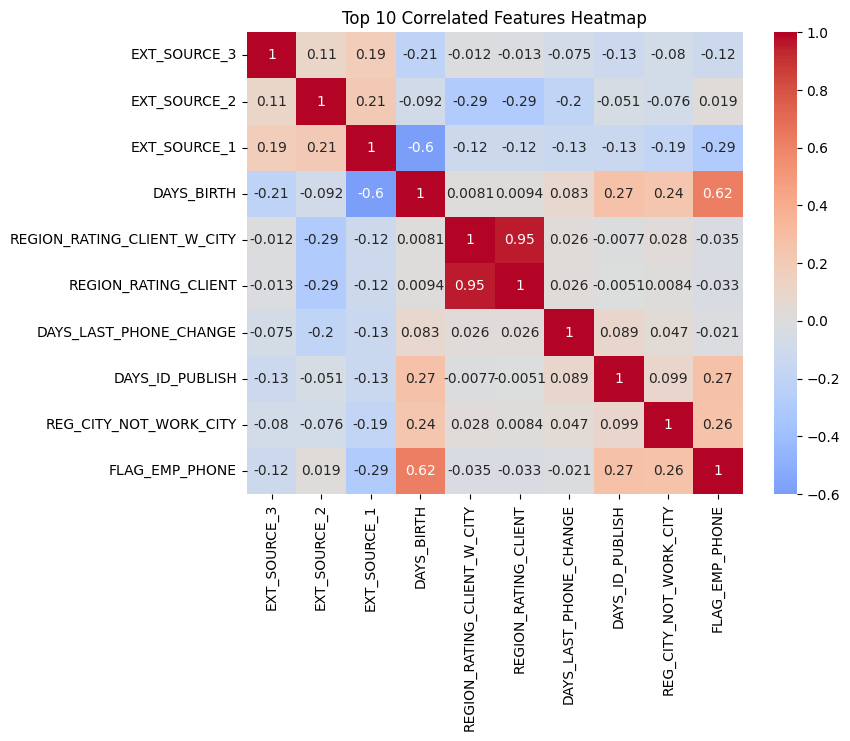

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

In [20]:
target_corr = corr['TARGET'].abs().sort_values(ascending=False)
top10 = target_corr.iloc[1:11].index

plt.figure(figsize=(8,6))
sns.heatmap(corr.loc[top10, top10], annot=True, cmap="coolwarm", center=0)
plt.title("Top 10 Correlated Features Heatmap")
plt.show()
plt.savefig("top10_corr_heatmap.png")

print(top10)

In [21]:
# (Feature Type Summary)

summary = {
    "Total Columns": app_train.shape[1],
    "Numeric Columns": len(app_train.select_dtypes(include=['float64','int64']).columns),
    "Categorical Columns": len(app_train.select_dtypes(include=['object']).columns),
    "Binary Columns": sum([app_train[col].nunique() == 2 for col in app_train.columns])
}

summary


{'Total Columns': 122,
 'Numeric Columns': 106,
 'Categorical Columns': 13,
 'Binary Columns': 37}

In [22]:
# Categorical Feature Cardinality Analysis

cat_cols = app_train.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(col, app_train[col].nunique())


NAME_CONTRACT_TYPE 2
CODE_GENDER 3
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
FONDKAPREMONT_MODE 4
HOUSETYPE_MODE 3
WALLSMATERIAL_MODE 7


High-cardinality features were identified for special encoding(Organization type, connot be encoded!!)

--- EXT_SOURCE_3 ---
Lower bound: -0.08, Upper bound: 1.12
Outlier count: 0



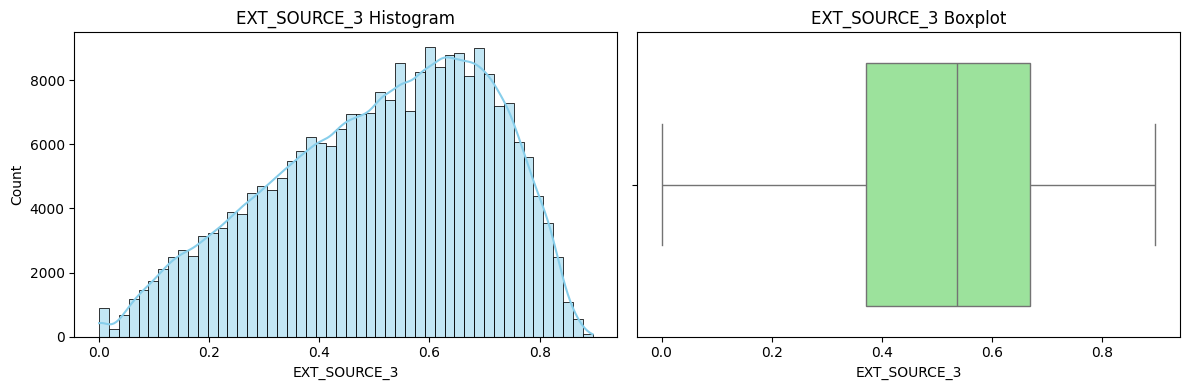

--- EXT_SOURCE_2 ---
Lower bound: -0.01, Upper bound: 1.07
Outlier count: 0



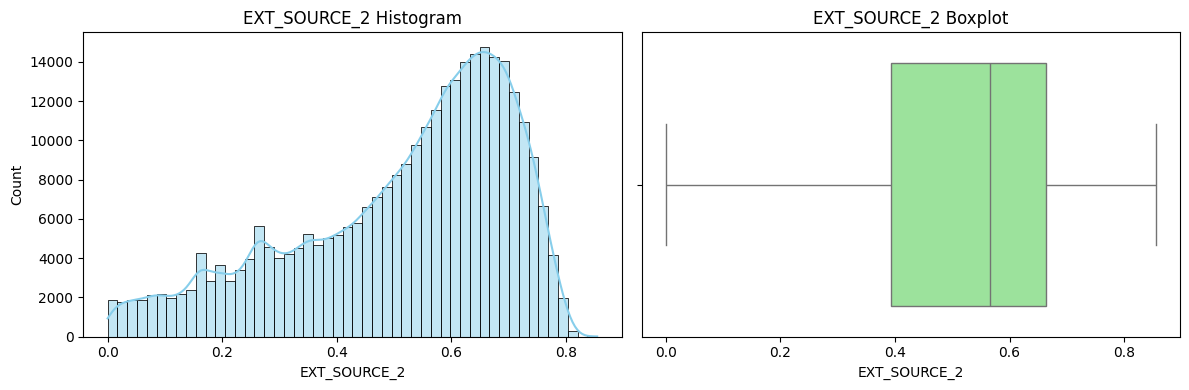

--- EXT_SOURCE_1 ---
Lower bound: -0.18, Upper bound: 1.19
Outlier count: 0



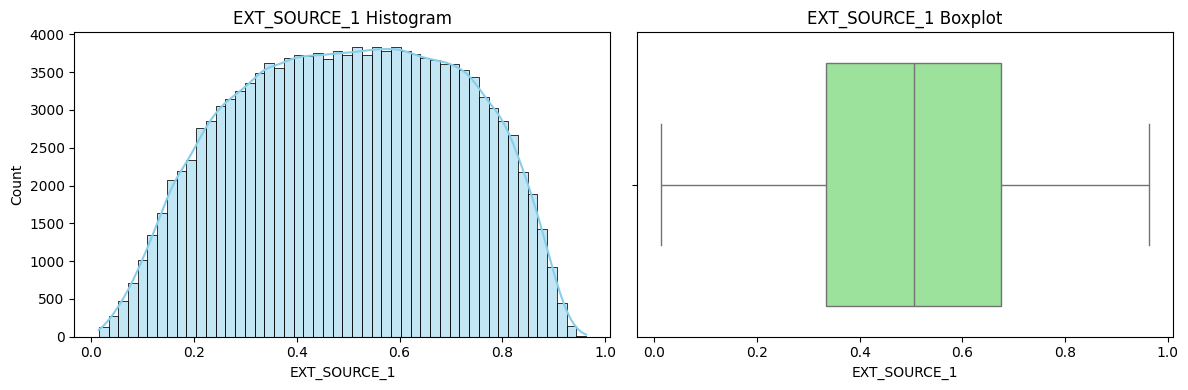

--- DAYS_BIRTH ---
Lower bound: -30585.50, Upper bound: -1509.50
Outlier count: 0



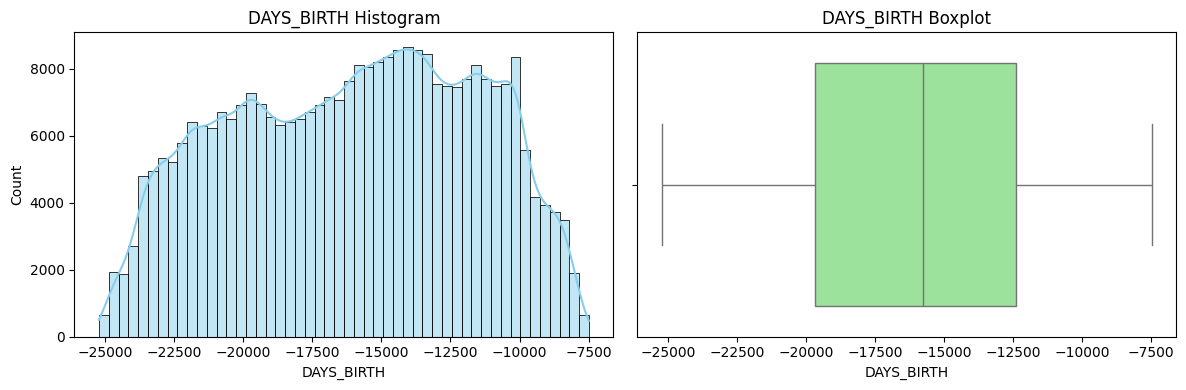

--- REGION_RATING_CLIENT_W_CITY ---
Lower bound: 2.00, Upper bound: 2.00
Outlier count: 78027



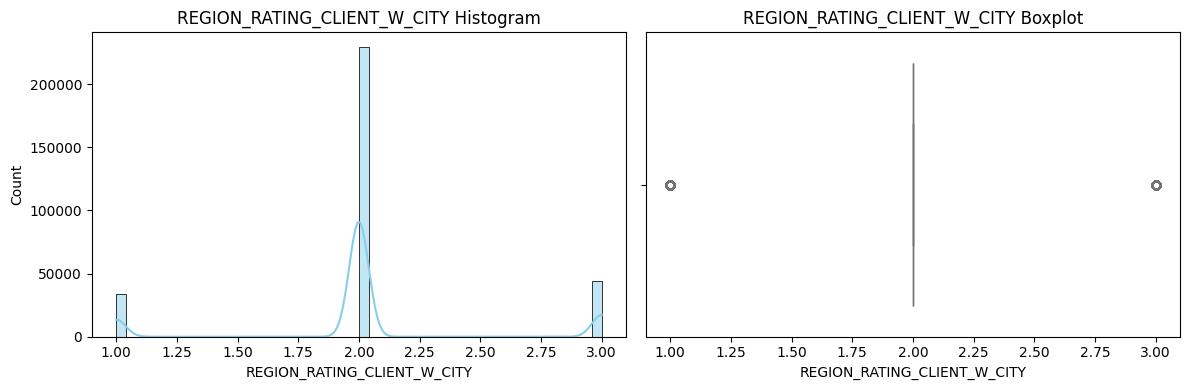

--- REGION_RATING_CLIENT ---
Lower bound: 2.00, Upper bound: 2.00
Outlier count: 80527



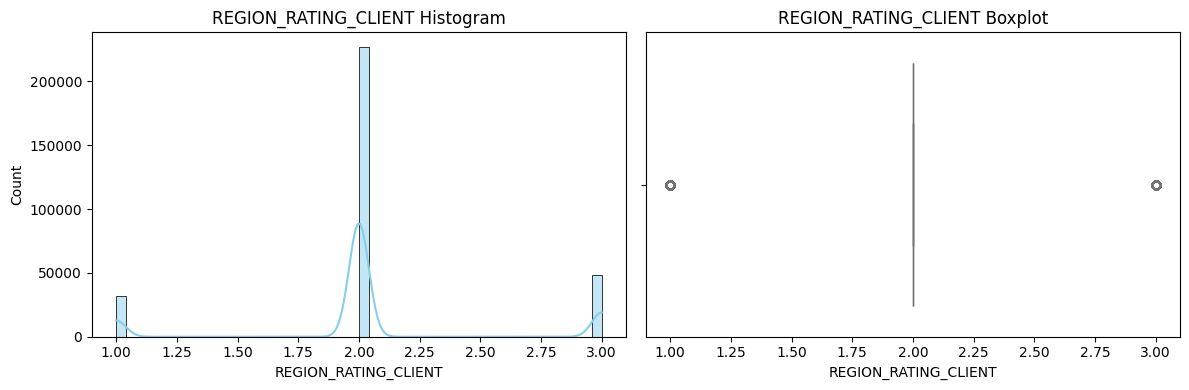

--- DAYS_LAST_PHONE_CHANGE ---
Lower bound: -3514.00, Upper bound: 1670.00
Outlier count: 435



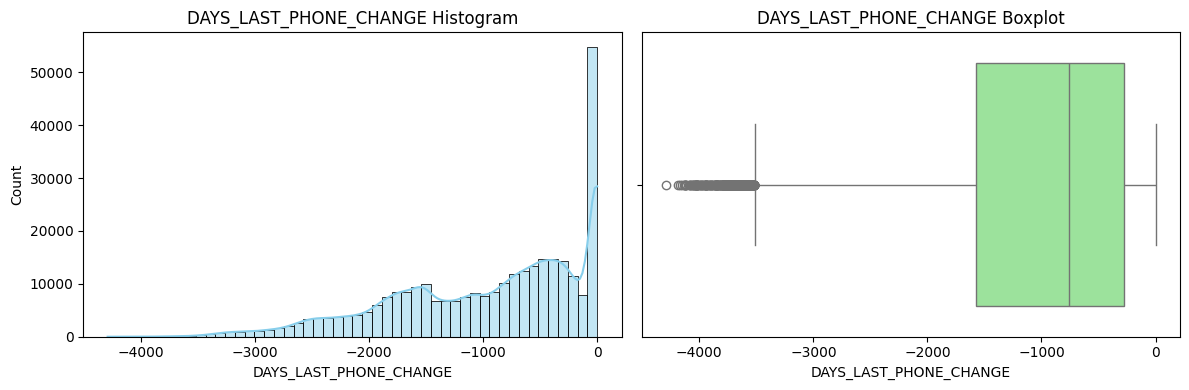

--- DAYS_ID_PUBLISH ---
Lower bound: -8167.50, Upper bound: 2148.50
Outlier count: 0



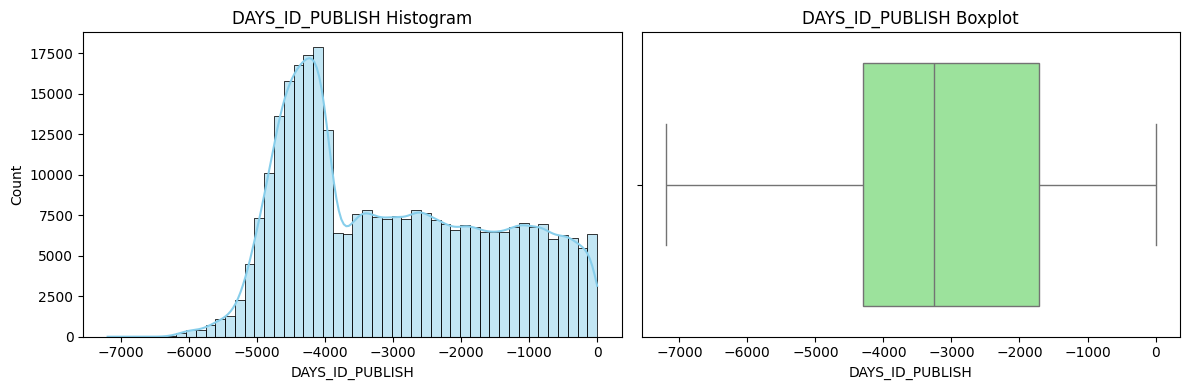

--- REG_CITY_NOT_WORK_CITY ---
Lower bound: 0.00, Upper bound: 0.00
Outlier count: 70867



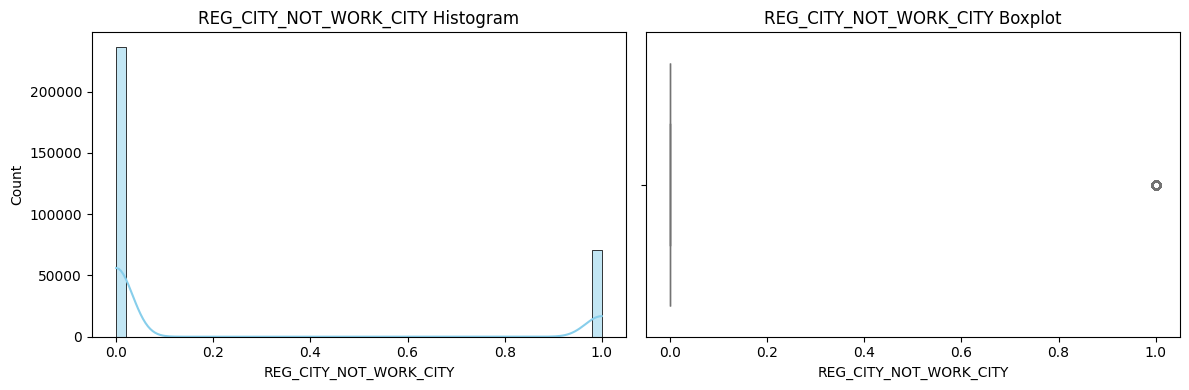

--- FLAG_EMP_PHONE ---
Lower bound: 1.00, Upper bound: 1.00
Outlier count: 55386



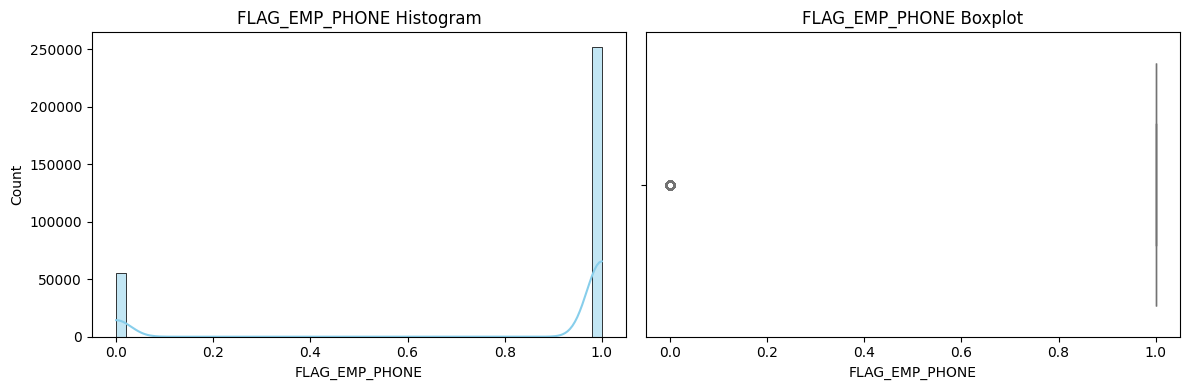

--- DAYS_EMPLOYED ---
Lower bound: -6466.50, Upper bound: 3417.50
Outlier count: 72217



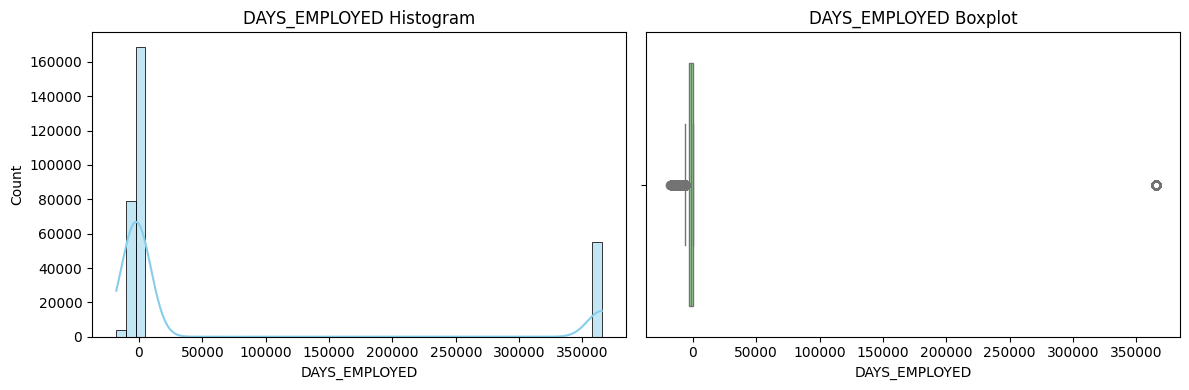

--- AMT_GOODS_PRICE ---
Lower bound: -423000.00, Upper bound: 1341000.00
Outlier count: 14728



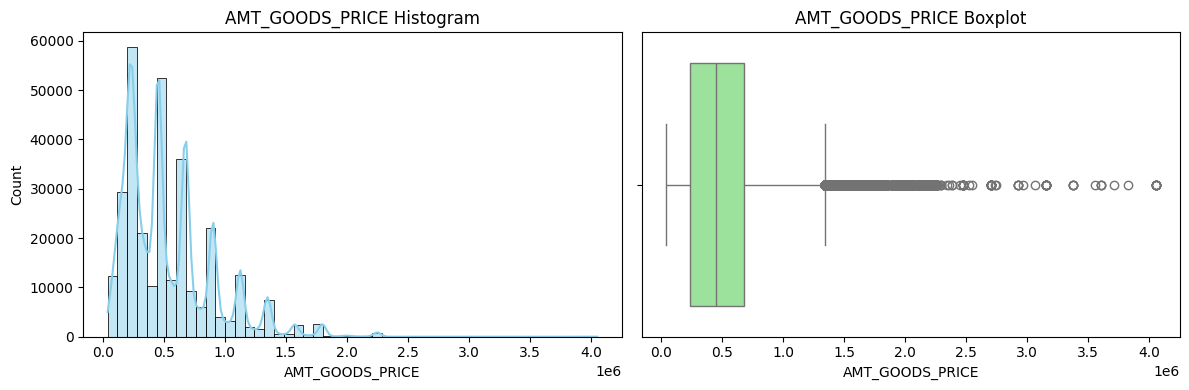

--- AMT_INCOME_TOTAL ---
Lower bound: -22500.00, Upper bound: 337500.00
Outlier count: 14035



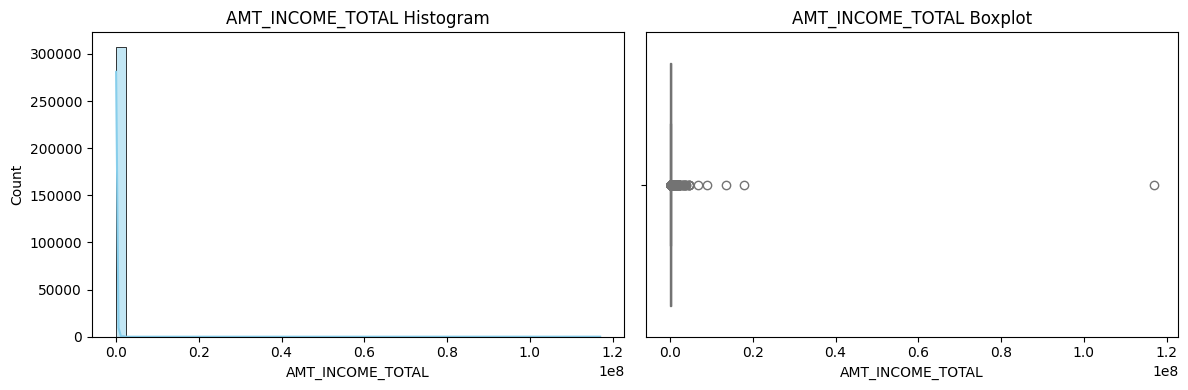

--- AMT_CREDIT ---
Lower bound: -537975.00, Upper bound: 1616625.00
Outlier count: 6562



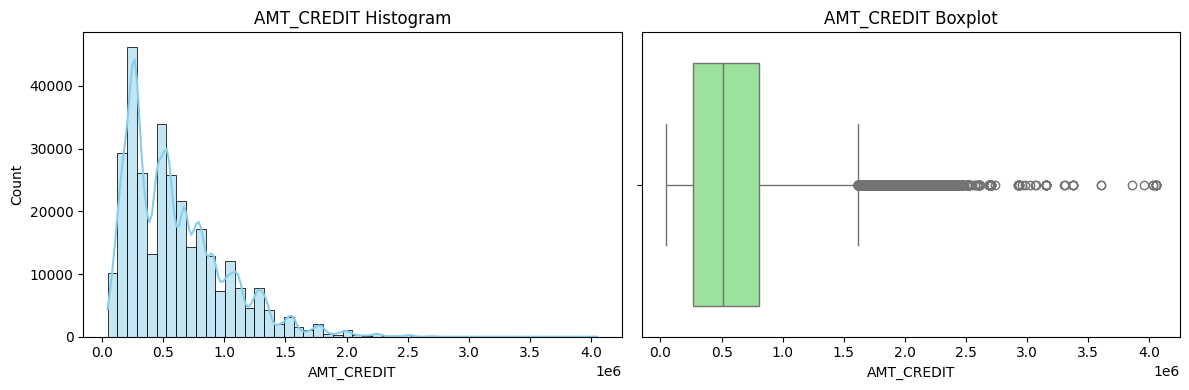

--- AMT_ANNUITY ---
Lower bound: -10584.00, Upper bound: 61704.00
Outlier count: 7504



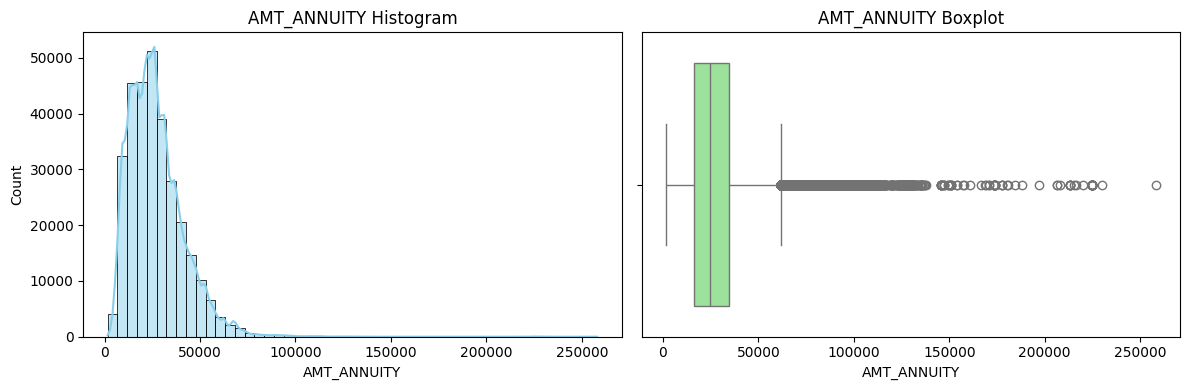

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ---------------------------
# High-correlation / Important Feature
# ---------------------------
high_corr_cols = [
    "EXT_SOURCE_3",                 # External risk score 3 from bureau; strong predictor of default
    "EXT_SOURCE_2",                 # External risk score 2 from bureau; highly correlated with EXT_SOURCE_3
    "EXT_SOURCE_1",                 # External risk score 1; commonly used in credit scoring models
    "DAYS_BIRTH",                   # Client's age in negative days; younger clients usually higher risk
    "REGION_RATING_CLIENT_W_CITY",  # Socio-economic rating of client's region including city; lower rating → higher risk
    "REGION_RATING_CLIENT",         # Socio-economic rating of client's region without city
    "DAYS_LAST_PHONE_CHANGE",       # Days since last phone change; recent change may indicate instability
    "DAYS_ID_PUBLISH",              # Days since ID was issued; recently issued IDs may indicate higher risk
    "REG_CITY_NOT_WORK_CITY",       # Client works in a city different from registered city; mismatch → risk signal
    "FLAG_EMP_PHONE",               # Employment phone provided? Missing slightly increases risk
    "DAYS_EMPLOYED",                # Days employed (negative); special value 365243 = not employed
    "AMT_GOODS_PRICE",              # Price of purchased goods financed by loan; higher prices may affect risk
    "AMT_INCOME_TOTAL",             # Total income of the client; key indicator of repayment capacity
    "AMT_CREDIT",                   # Total credit amount; strongly correlated with repayment risk
    "AMT_ANNUITY"                   # Monthly loan installment; important for debt-to-income ratio
]

# ---------------------------
# Convert all potentially non-numeric columns to numeric
# ---------------------------
numeric_cols = [
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "DAYS_LAST_PHONE_CHANGE",
    "DAYS_ID_PUBLISH",
    "REGION_RATING_CLIENT_W_CITY",
    "REGION_RATING_CLIENT",
    "REG_CITY_NOT_WORK_CITY",
    "FLAG_EMP_PHONE",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "AMT_GOODS_PRICE",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY"
]

for col in numeric_cols:
    app_train[col] = pd.to_numeric(app_train[col], errors='coerce')  # convert to numeric, invalid parsing = NaN

# ---------------------------
# Function to detect outliers using IQR
# ---------------------------
def outlier_summary(df, col):
    """
    Prints outlier summary for a numeric column using IQR method.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"--- {col} ---")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Outlier count: {len(outliers)}\n")

# ---------------------------
# Loop through features to generate summary and plots
# ---------------------------
for col in high_corr_cols:
    # 1) Outlier summary
    outlier_summary(app_train, col)

    # 2) Histogram + Boxplot for numeric features
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(app_train[col].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f"{col} Histogram")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=app_train[col].dropna(), color='lightgreen')
    plt.title(f"{col} Boxplot")

    plt.tight_layout()
    plt.show()


The key drivers of credit risk in the Home Credit dataset are captured by a combination of external risk scores, demographic characteristics, socio-economic factors, and behavioral stability indicators. Specifically:

External risk scores (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3) are the most powerful predictors of credit default, summarizing historical credit behavior and bureau information.

Age (DAYS_BIRTH) is a strong demographic signal, with younger clients generally showing higher default probability.

Regional socio-economic indicators (REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY) reflect the financial and social environment of the client, influencing repayment behavior.

Behavioral stability features (DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH, REG_CITY_NOT_WORK_CITY, FLAG_EMP_PHONE) provide insight into personal stability and consistency, which are well-known factors in credit risk modeling.

Financial characteristics (AMT_GOODS_PRICE, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED) capture the client’s income, debt burden, and employment duration, which are essential for assessing repayment capacity.

Together, these variables exhibit the highest correlation with the target variable and are widely recognized in the credit risk literature as robust structural predictors of default.